MONTECARLO TIPO 1: Es un metodo de integracion de funciones que se basa en la definición de valor promedio de una función y en el valor esperado de una variable aleatoria uniforme. Este valor promedio se puede calcular distribuyendo puntos aleatoriamente y sacando el promedio de los mismos. Este metodo nos permite aproximar integrales de funciones continuas de una variable en un intervalo dado. MONTECARLO TIPO 2: Este segundo metodo tiene como principal ventaja aproximar funciones complejas asi como funciones de multiples variables. 

Aproximar el valor del área de un círculo unitario. Teniendo en cuenta que el area del círculo unitario es de pi. Posteriormente se tiene que evaluar la probabilidad de que un punto aleaotrio (x,y) esté dentro del circulo unitario. Esto produce un numero aleatorio de Bernoulli.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web

TIPO 1

In [16]:
def f(x):
    return 1/(np.log(x))

def g(x):
    return np.log(np.log(x))

def h(x):
    return np.exp(np.exp(x))

def int_montecarlo1(f, a, b, N):
    return (b-a)/N*np.sum(f(np.random.uniform(a,b,N)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


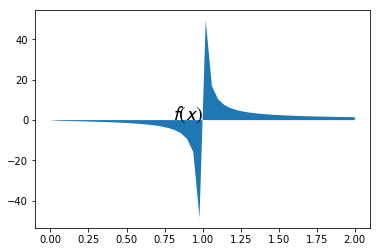

In [17]:
x = np.linspace(0,2)
y = f(x)

plt.fill_between(x,y)
plt.text(0.8,0.2,'$\mathcal{f(x)}$',fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


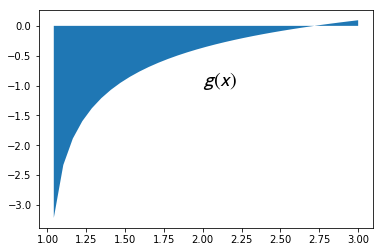

In [18]:
x = np.linspace(0,3)
y = g(x)

plt.fill_between(x,y)
plt.text(2,-1,'$\mathcal{g(x)}$',fontsize=20)
plt.show()

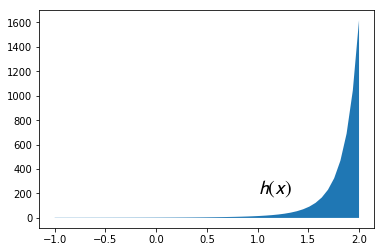

In [19]:
x = np.linspace(-1,2)
y = h(x)

plt.fill_between(x,y)
plt.text(1,200,'$\mathcal{h(x)}$',fontsize=20)
plt.show()

In [20]:
N = 100000
x = np.random.uniform(4, 5, N)

A_Dapprox = np.sum(f(x))/N
A_Dapprox
A_D = 1/3

N = np.logspace(1,7,7)

df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    x = np.random.uniform(4, 5, n.astype(int))
    df.loc[n,"Valor_aproximacion"] = np.sum(f(x))/n
    df.loc[n,"Error_relativo"] = np.abs(df.loc[n,"Valor_aproximacion"]-A_D)/A_D
    
df

,Valor_aproximacion,Error_relativo
Cantidad_terminos,,
10.0,0.675491,1.026473
100.0,0.668518,1.005553
1000.0,0.667629,1.002888
10000.0,0.667062,1.001186
100000.0,0.667107,1.001322
1000000.0,0.667013,1.001038
10000000.0,0.667017,1.001050


In [21]:
N = 100000
x = np.random.uniform(4, 5, N)

A_Dapprox = np.sum(g(x))/N
A_Dapprox
A_D = 1/3

N = np.logspace(1,7,7)

df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    x = np.random.uniform(4, 5, n.astype(int))
    df.loc[n,"Valor_aproximacion"] = np.sum(g(x))/n
    df.loc[n,"Error_relativo"] = np.abs(df.loc[n,"Valor_aproximacion"]-A_D)/A_D
    
df

,Valor_aproximacion,Error_relativo
Cantidad_terminos,,
10.0,0.421153,0.263458
100.0,0.406596,0.219787
1000.0,0.405255,0.215765
10000.0,0.406626,0.219878
100000.0,0.405889,0.217667
1000000.0,0.405721,0.217163
10000000.0,0.405888,0.217665


In [22]:
N = 100000
x = np.random.uniform(4, 5, N)

A_Dapprox = np.sum(h(x))/N
A_Dapprox
A_D = 1/3

N = np.logspace(1,7,7)

df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    x = np.random.uniform(4, 5, n.astype(int))
    df.loc[n,"Valor_aproximacion"] = np.sum(h(x))/n
    df.loc[n,"Error_relativo"] = np.abs(df.loc[n,"Valor_aproximacion"]-A_D)/A_D
    
df

,Valor_aproximacion,Error_relativo
Cantidad_terminos,,
10.0,6.022323e+54,1.806697e+55
100.0,7.536681e+60,2.261004e+61
1000.0,1.665840e+62,4.997521e+62
10000.0,1.862255e+62,5.586764e+62
100000.0,1.848657e+62,5.545972e+62
1000000.0,1.938002e+62,5.814006e+62
10000000.0,1.935408e+62,5.806223e+62


In [23]:
a, b = 4, 5

N = np.logspace(1,5,5)

df = pd.DataFrame(index=N,columns=['Funcion1', 'Funcion2', 'Funcion3'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    df.loc[n,"Funcion1"] = int_montecarlo1(f, a, b, n.astype(int))
    df.loc[n,"Funcion2"] = int_montecarlo1(g, a, b, n.astype(int))
    df.loc[n,"Funcion3"] = int_montecarlo1(h, a, b, n.astype(int))
    
df

,Funcion1,Funcion2,Funcion3
Cantidad_terminos,,,
10.0,0.650176,0.400217,7.380294e+57
100.0,0.660499,0.407891,7.041891e+61
1000.0,0.667309,0.405743,2.869211e+62
10000.0,0.666732,0.406114,2.001167e+62
100000.0,0.666949,0.406170,1.856548e+62


MONTECRALO TIPO 2

In [24]:
N = 1000000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

In [25]:
def int_montecarlo2(region, a1, b1, a2, b2, N):
    A_R = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N.astype(int))
    y = np.random.uniform(a2, b2, N.astype(int))
    return A_R*np.sum(region(x,y))/N

N = 100
x = np.linspace(4, 5, N)
y = np.linspace(0, 1, N)

In [26]:
def region1(x,y):
    return f(x)>=y

def region2(x,y):
    return g(x)>=y

def region3(x,y):
    return h(x)>=y

In [27]:

a1, b1, a2, b2 = 4, 5, 0, f(4)
N = np.logspace(1,5,5)

df = pd.DataFrame(index=N,columns=['Valor_aproximacion'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    df.loc[n,"Valor_aproximacion"] = int_montecarlo2(region1, a1, b1, a2, b2, n)
        
df

,Valor_aproximacion
Cantidad_terminos,
10.0,0.649213
100.0,0.663640
1000.0,0.664361
10000.0,0.666309
100000.0,0.667679


In [28]:
a1, b1, a2, b2 = 4, 5, 0, g(5)
N = np.logspace(1,5,5)

df = pd.DataFrame(index=N,columns=['Valor_aproximacion'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    df.loc[n,"Valor_aproximacion"] = int_montecarlo2(region2, a1, b1, a2, b2, n)
        
df

,Valor_aproximacion
Cantidad_terminos,
10.0,0.333119
100.0,0.385467
1000.0,0.404502
10000.0,0.405835
100000.0,0.405378


In [29]:
a1, b1, a2, b2 = 4, 5, 0, h(4)
N = np.logspace(1,5,5)

df = pd.DataFrame(index=N,columns=['Valor_aproximacion'], dtype='float')
df.index.name = "Cantidad_terminos"

for n in N:
    df.loc[n,"Valor_aproximacion"] = int_montecarlo2(region3, a1, b1, a2, b2, n)
        
df

,Valor_aproximacion
Cantidad_terminos,
10.0,5.148436e+23
100.0,5.148436e+23
1000.0,5.148436e+23
10000.0,5.148436e+23
100000.0,5.148436e+23


PROBABILIDAD PRECIO UMBRAL

In [30]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

ticker = 'AAPL'
start_date = '2017-01-01'
end_date = '2017-12-31'
closes = get_historical_closes(ticker, start_date, end_date)

closes.columns = ['AAPL']
closes

,AAPL
Date,
2017-01-03,111.709831
2017-01-04,111.584778
2017-01-05,112.152229
2017-01-06,113.402542
2017-01-09,114.441246
2017-01-10,114.556656
2017-01-11,115.172195
2017-01-12,114.691307
2017-01-13,114.489334


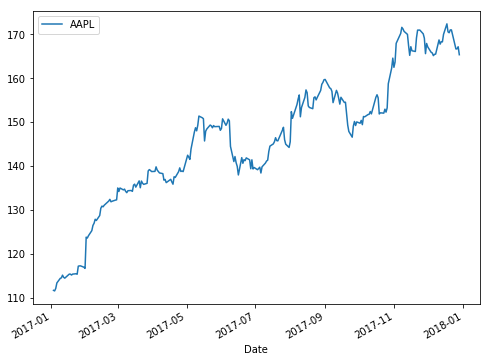

In [31]:
closes.plot(figsize=(8,6));

In [32]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

ticker = 'MSFT'
start_date = '2017-01-01'
end_date = '2017-12-31'
closes = get_historical_closes(ticker, start_date, end_date)

closes.columns = ['MSFT']
closes

,MSFT
Date,
2017-01-03,59.694695
2017-01-04,59.427597
2017-01-05,59.427597
2017-01-06,59.942703
2017-01-09,59.751923
2017-01-10,59.732849
2017-01-11,60.276566
2017-01-12,59.723312
2017-01-13,59.809166


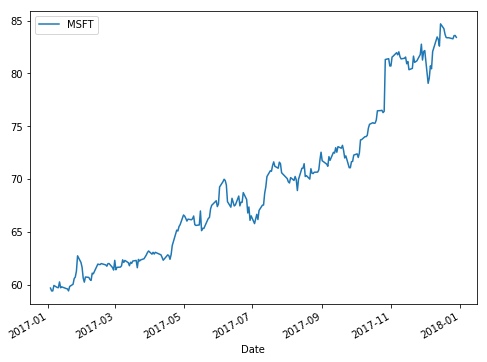

In [33]:
closes.plot(figsize=(8,6));

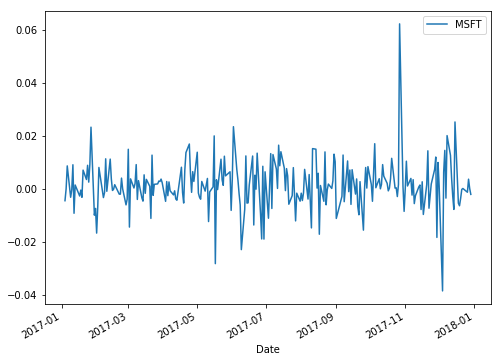

In [34]:
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
daily_returns = calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [35]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

ndays = 360
ntraj = 100
start_date = '2017-01-01'
simret = daily_ret_sim(mu, sigma, ndays, ntraj, start_date)

simret

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,-0.010146,-0.000733,0.013836,0.007782,0.001676,-0.008114,-0.007593,-0.004760,0.001909,0.016565,...,-0.001369,0.007988,-0.001905,-0.003194,-0.011652,0.001840,-0.012865,0.003877,0.000109,0.003308
2017-01-02,-0.008395,0.000099,-0.001374,0.001595,0.014858,0.013222,0.009096,0.006049,-0.019349,0.023201,...,0.004883,0.014573,0.006375,-0.009639,-0.003810,-0.010754,-0.018387,0.007245,0.005305,0.010728
2017-01-03,-0.005974,0.004552,0.008374,0.002082,0.021228,0.001586,0.005146,-0.004933,0.013153,-0.014255,...,-0.006732,-0.009579,-0.006850,-0.008010,-0.007259,0.004550,0.003339,-0.001472,0.001680,-0.011703
2017-01-04,0.003946,-0.001073,0.009443,-0.008088,0.009897,-0.004124,0.011245,-0.003923,-0.009176,0.009589,...,0.005799,-0.007069,-0.000999,0.001101,0.002730,0.000774,0.004724,-0.001174,-0.004795,-0.008040
2017-01-05,-0.007416,0.002799,-0.000726,-0.004522,0.000885,0.018248,0.020802,0.000033,-0.008126,0.009620,...,-0.008761,-0.019474,-0.009364,-0.007768,-0.006973,0.009382,0.001967,-0.004586,-0.005870,0.019827
2017-01-06,-0.015730,0.007201,-0.014986,-0.006045,-0.006157,-0.009319,0.002594,-0.000111,0.014736,-0.001434,...,0.006989,0.015543,-0.002330,-0.013145,-0.013170,0.006149,-0.001911,0.006749,0.001278,-0.000989
2017-01-07,0.006606,-0.010946,-0.007933,-0.005858,-0.000423,-0.006406,-0.004051,0.015370,0.000112,0.008753,...,-0.000687,-0.008946,0.001848,-0.001609,-0.005427,0.009982,-0.020899,0.013677,0.004389,0.015348
2017-01-08,0.000612,0.003437,0.009079,-0.017144,0.024416,0.004473,-0.005203,-0.002827,-0.006589,0.011016,...,0.008141,0.023431,0.012589,-0.004617,-0.015151,0.013317,0.015929,0.014134,0.003181,0.009112
2017-01-09,0.016047,0.019718,-0.001540,0.011109,0.005081,-0.006875,-0.001953,-0.001273,0.019732,0.020496,...,-0.006619,-0.003671,0.000636,-0.014047,-0.002126,-0.002169,-0.007358,-0.021874,-0.001144,-0.010274
2017-01-10,-0.018746,0.003870,0.000669,0.007295,-0.006122,-0.003408,0.009122,-0.003273,0.008854,0.008249,...,-0.003585,-0.006776,0.012123,0.007859,-0.008233,-0.009172,0.006666,0.005822,0.018623,-0.000270


In [36]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,82.575931,83.356904,84.580238,84.069756,83.557973,82.743900,82.787034,83.021879,83.577411,84.811323,...,83.303902,84.087008,83.259278,83.152017,82.451647,83.571687,82.351758,83.742052,83.427159,83.694399
2017-01-02,81.885583,83.365198,84.464119,84.203918,84.808734,83.845208,83.543530,83.525620,81.975776,86.802041,...,83.711638,85.321345,83.791731,82.354343,82.138119,82.677780,80.851367,84.350928,83.870912,84.597143
2017-01-03,81.397880,83.745512,85.174378,84.379384,86.628302,83.978317,83.974590,83.114625,83.061151,85.573468,...,83.149983,84.507982,83.219731,81.697322,81.544007,83.054795,81.121747,84.226820,84.011932,83.612858
2017-01-04,81.719745,83.655670,85.982481,83.699648,87.489906,83.632732,84.924234,82.789216,82.302450,86.397970,...,83.633571,83.912693,83.136595,81.787316,81.766905,83.119100,81.505894,84.127960,83.610065,82.943264
2017-01-05,81.115914,83.890184,85.920053,83.322015,87.567336,85.172907,86.709324,82.791947,81.636386,87.233091,...,82.904071,82.294362,82.361723,81.154444,81.198750,83.902604,81.666340,83.743018,83.120683,84.604177
2017-01-06,79.849906,84.496457,84.642083,82.819870,87.029797,84.382864,86.934512,82.782795,82.848246,87.108086,...,83.485534,83.583498,82.170038,80.094610,80.136396,84.420130,81.510426,84.310131,83.226975,84.520521
2017-01-07,80.379160,83.576579,83.973236,82.336157,86.992995,83.844039,86.583092,84.064990,82.857495,87.873933,...,83.428204,82.839128,82.322043,79.965833,79.702710,85.266993,79.824611,85.471205,83.593035,85.827728
2017-01-08,80.428404,83.864293,84.739111,80.936657,89.143127,84.219911,86.133728,83.827693,82.313370,88.847291,...,84.110179,84.803058,83.364987,79.597505,78.504264,86.410114,81.106343,86.687803,83.859331,86.613376
2017-01-09,81.729464,85.534334,84.608746,81.840801,89.597175,83.642925,85.965674,83.721014,83.953684,90.687118,...,83.555305,84.492327,83.418001,78.487188,78.337532,86.222933,80.511742,84.812158,83.763428,85.728104
2017-01-10,80.211669,85.865952,84.665328,82.439982,89.050374,83.358374,86.753448,83.447463,84.700337,91.438275,...,83.256267,83.921718,84.435398,79.106461,77.695263,85.435699,81.050200,85.307395,85.337944,85.704947


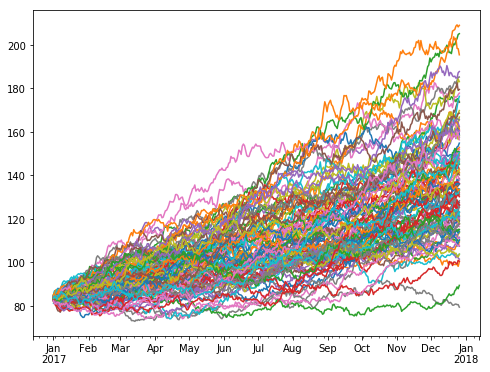

In [37]:
simdata.plot(figsize=(8,6),legend=False);

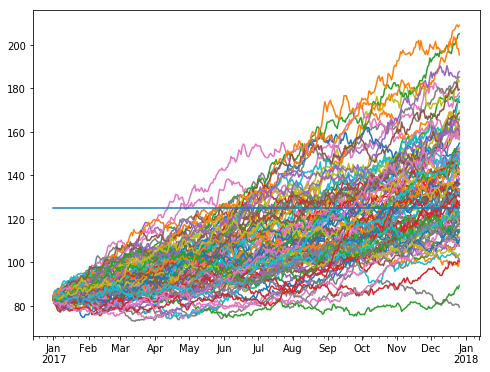

In [38]:
K = 125
dates = pd.date_range('20170101',periods=ndays)
strike = pd.DataFrame({'Strike':K*np.ones(ndays)},index=dates)
simul = pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

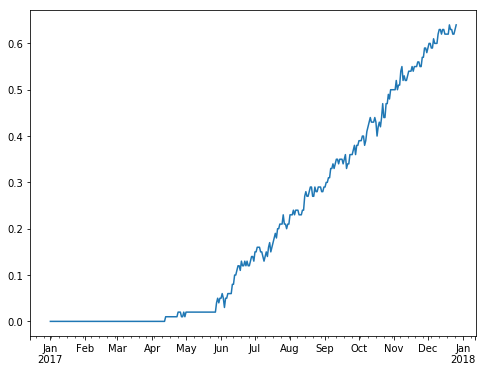

In [39]:
strike = pd.DataFrame(K*np.ones((ndays,ntraj)),index=dates)
count = simdata>strike
prob = count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

In [40]:
closes.iloc[-1]

MSFT    83.41803
Name: 2017-12-29 00:00:00, dtype: float64